<a href="https://colab.research.google.com/github/SenaKymk/naive_bayes_YZM212_lab/blob/main/veri_%C3%B6ni%C5%9Fleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Veri Ön İşleme - Diyabet Tahmini**

## 📌 Giriş
Bu notebook, diyabet tahmini için kullanılacak veri setinin **temizlenmesi ve analizi** amacıyla oluşturulmuştur.

Veri seti kaggledan alınmıştır ve bu linkten erişilebilir:
[diabetes.csv](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database )

Veri seti üzerinde aşağıdaki işlemler gerçekleştirilmiştir:
- **Verinin incelenmesi**
- **Özellik seçimi ve gereksiz değişkenlerin çıkarılması**
- **Eksik verilerin tespiti ve doldurulması**
- **Veri dağılımının analizi ve görselleştirme**
- **Temizlenmiş verinin kaydedilmesi**

Bu işlemler sonucunda **model eğitiminde kullanılacak veri seti** oluşturulacaktır.


In [7]:
#gerekli kütüphaneler import edilir
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns

# pythonda uyarıları kapatır
import warnings
warnings.filterwarnings("ignore")

**1.Adım: Veri yüklenir ve içeriği incelenir**

In [8]:
# veriyi içe aktarılır
veri = pd.read_csv("/content/diabetes.csv")
#verinin ilk 5 satırını gösterir
veri.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
#verinin genel içeriği hakkında bilgi edinilir.
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**2.Adım: Özellik seçimi ve gereksiz değişkenlerin çıkarılması**

Öznitelik seçimi yapmak için korelasyon analizi yapılır. ardından düşük değere sahip öznitelik stunları veriden çıkarılır.

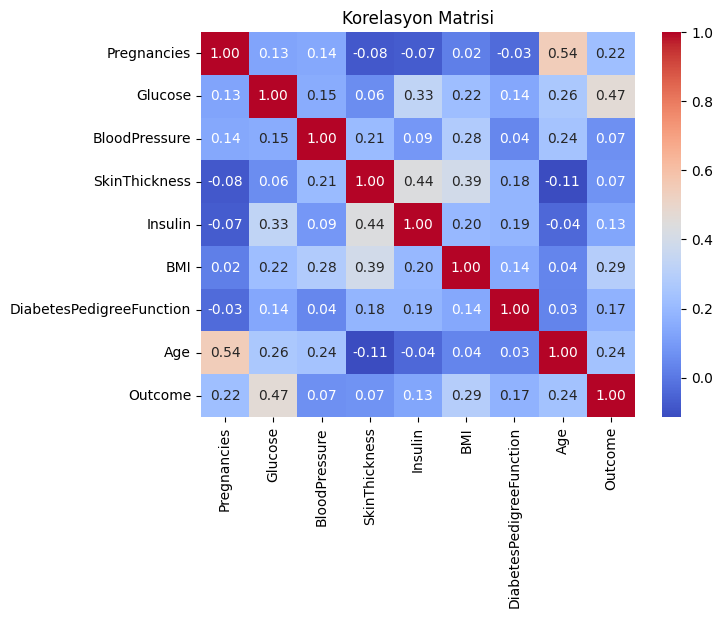

In [13]:

df = pd.read_csv("diabetes.csv")
# Korelasyon matrisini hesaplayalım
correlation_matrix = df.corr()

# Isı haritası ile görselleştirelim
plt.figure(figsize=(7,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()


Korelasyon matrisi, her bir özelliğin (feature) "Outcome" ile ne kadar ilişkili olduğunu gösterir. Outcome sütunundaki değerlere odaklanarak hangi değişkenlerin önemli olup olmadığını analiz ettik. Bu analize göre Insulin, BloodPressure ve SkinThickness değişkenlerinin Outcome ile korelasyonu 0.2 den düşük.
Bu yüzden bu üç özelliği çıkarabiliriz.

In [14]:
veri = df.drop(columns=["Insulin", "BloodPressure", "SkinThickness"])  # Gereksiz değişkenleri çıkar
veri.to_csv("veri.csv", index=False)
veri.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,33.6,0.627,50,1
1,1,85,26.6,0.351,31,0
2,8,183,23.3,0.672,32,1
3,1,89,28.1,0.167,21,0
4,0,137,43.1,2.288,33,1


**3. Adım: Eksik veri analizi**

verisetinde eksik veri olup olmadığı kontrol edilir. Eğer eksik veri varsa ortalama değer ile doldurulur.

In [15]:
print(veri.isnull().sum())  # Her sütundaki eksik veri sayısını gösterir
veri.fillna(veri.mean(), inplace=True)  # Eksik değerleri ortalama ile doldur

Pregnancies                 0
Glucose                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Görüldüğü üzere veride eksik veri yok. Ama eksik veri olsaydı ortalama ile doldurulacaktı.

 **4.Adım: Veri dağılımının analizi ve görselleştirme**

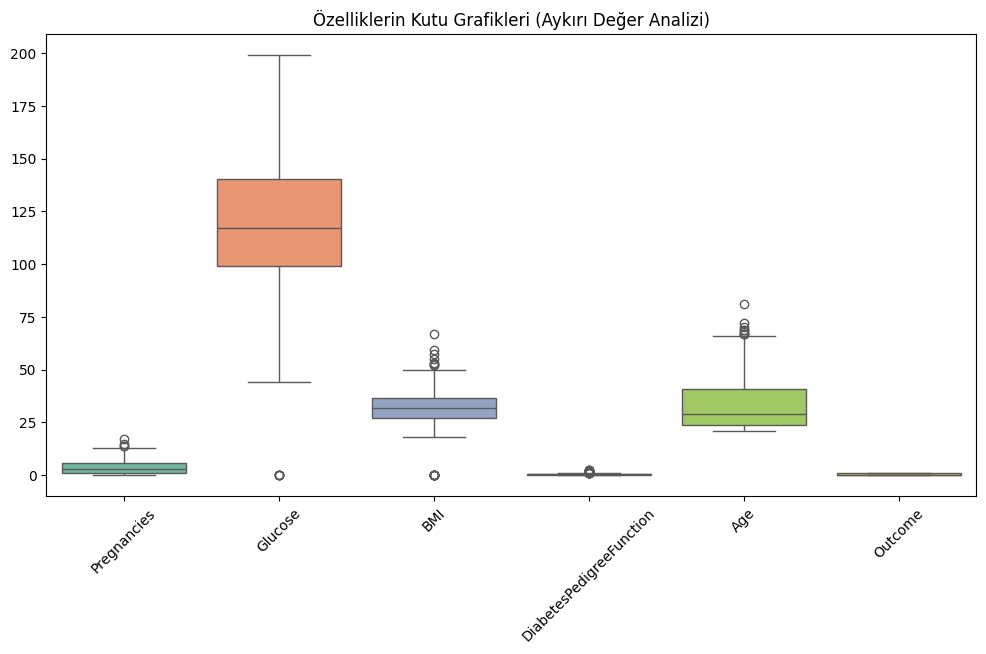

In [17]:
#aykırı değer analizi yapalım ve görselleştirelim
plt.figure(figsize=(12,6))
sns.boxplot(data=veri, palette="Set2")
plt.xticks(rotation=45)
plt.title("Özelliklerin Kutu Grafikleri (Aykırı Değer Analizi)")
plt.show()


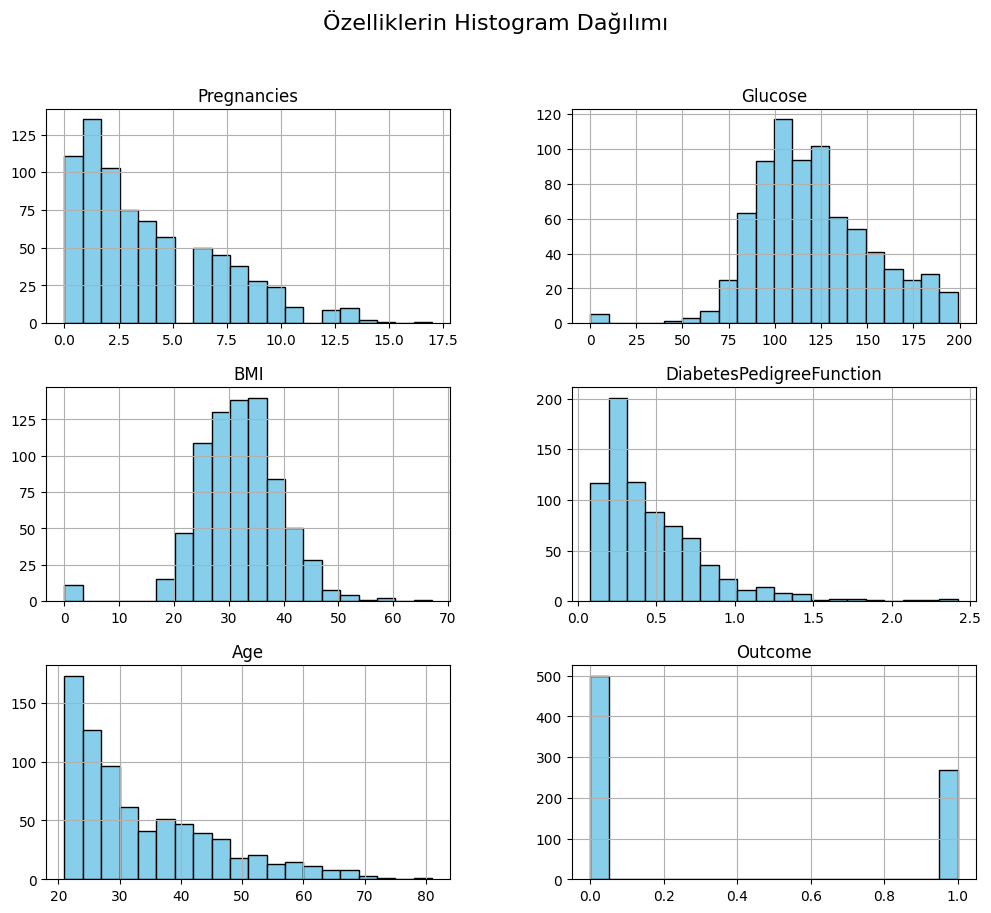

In [18]:
veri.hist(figsize=(12,10), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Özelliklerin Histogram Dağılımı", fontsize=16)
plt.show()


**5. Temizlenmiş Veriyi Kaydetme**

Veri ön işleme işlemleri tamamlandıktan sonra, **diabetes_veri_temiz.csv** dosyası kaydedilir.  
Bu dosya daha sonra **Naive Bayes modeli** için kullanılır.

In [16]:
veri.to_csv("diabetes_veri_temiz.csv", index=False)